<a href="https://colab.research.google.com/github/sachincs3108/Machine_Learning_case-studies/blob/main/linear_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Sachin Yeshwant Rasam


---
Roll:13 

Assignment:10- regression analysis


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/pgp data sets/DataSets1/auto-mpg.csv")
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
df1.shape

(398, 8)

In [ ]:
df1["car name"].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [ ]:
company=[]
for i in df1["car name"]:
  company.append(i.split(" ")[0])

In [ ]:
company

['chevrolet',
 'buick',
 'plymouth',
 'amc',
 'ford',
 'ford',
 'chevrolet',
 'plymouth',
 'pontiac',
 'amc',
 'dodge',
 'plymouth',
 'chevrolet',
 'buick',
 'toyota',
 'plymouth',
 'amc',
 'ford',
 'datsun',
 'volkswagen',
 'peugeot',
 'audi',
 'saab',
 'bmw',
 'amc',
 'ford',
 'chevy',
 'dodge',
 'hi',
 'datsun',
 'chevrolet',
 'toyota',
 'ford',
 'amc',
 'plymouth',
 'chevrolet',
 'ford',
 'amc',
 'chevrolet',
 'pontiac',
 'ford',
 'plymouth',
 'dodge',
 'ford',
 'pontiac',
 'amc',
 'chevrolet',
 'pontiac',
 'ford',
 'mercury',
 'opel',
 'peugeot',
 'fiat',
 'toyota',
 'datsun',
 'volkswagen',
 'plymouth',
 'toyota',
 'dodge',
 'volkswagen',
 'chevrolet',
 'ford',
 'chevrolet',
 'pontiac',
 'plymouth',
 'ford',
 'amc',
 'mercury',
 'buick',
 'oldsmobile',
 'chrysler',
 'mazda',
 'amc',
 'chevrolet',
 'ford',
 'plymouth',
 'volvo',
 'volkswagen',
 'peugeot',
 'renault',
 'ford',
 'datsun',
 'toyouta',
 'dodge',
 'toyota',
 'buick',
 'amc',
 'chevrolet',
 'ford',
 'dodge',
 'mercury',

In [ ]:
df1["company"]=company

In [ ]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,company
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,ford


In [ ]:
df1.drop("car name",1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,company
0,18.0,8,307.0,130,3504,12.0,70,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc
4,17.0,8,302.0,140,3449,10.5,70,ford


In [ ]:
df_mod=df1.drop("company",1)
df_mod.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [ ]:
df_mod.corr()

,mpg,cylinders,displacement,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


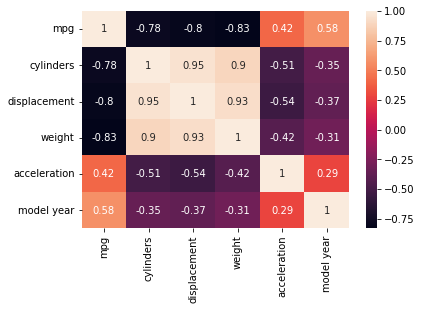

In [ ]:
import seaborn as sns
sns.heatmap(df_mod.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


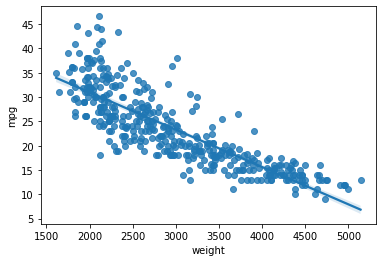

In [ ]:
sns.regplot(df_mod["weight"],df_mod["mpg"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


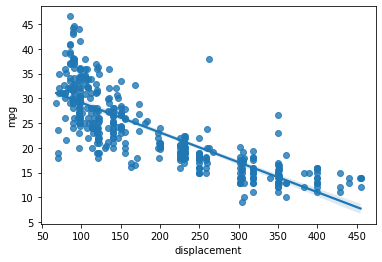

In [ ]:
sns.regplot(df_mod["displacement"],df_mod["mpg"])

In [ ]:
df_mod.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

In [ ]:
df_mod.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
dtype: object

In [ ]:
df_mod["horsepower"]=df_mod["horsepower"].str.replace("?","0")
df_mod["horsepower"]=pd.to_numeric(df_mod["horsepower"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
x=df_mod.drop("mpg",1)
y=df_mod["mpg"]
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x)
x_tr,x_test,y_tr,y_test=train_test_split(x_scaled,y,test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Select K Features 
#data reduction

In [ ]:
#data reduction
fs_model=SelectKBest(f_regression,k=2).fit(x_scaled,y)

In [ ]:
x_best=fs_model.transform(x_scaled)

In [ ]:
cols=fs_model.get_support(indices=True)
cols

array([1, 3])

In [ ]:
x.iloc[:,cols]

,displacement,weight
0,307.0,3504
1,350.0,3693
2,318.0,3436
3,304.0,3433
4,302.0,3449
...,...,...
393,140.0,2790
394,97.0,2130
395,135.0,2295
396,120.0,2625


In [ ]:
lm=LinearRegression().fit(x_tr,y_tr)

In [ ]:
p=lm.predict(x_test)
r2_score(y_test,p)

0.7537926334710615

#PCA


In [ ]:
#pca
pca_mod=PCA(n_components=.95)

In [ ]:
x_pca=pca_mod.fit_transform(x_scaled)

In [ ]:
pca_mod.explained_variance_

array([4.23082582, 0.84051556, 0.67576358])

In [ ]:
x_tr,x_test,y_tr,y_test=train_test_split(x_pca,y,test_size=0.2)

In [ ]:
lm1=LinearRegression().fit(x_tr,y_tr)

In [ ]:
p1=lm1.predict(x_test)
r2_score(y_test,p1)

0.7547361085248026

#Lasso regression

In [ ]:
model=Lasso(alpha=1.0).fit(x_tr,y_tr)

In [ ]:
pred=model.predict(x_test)

In [ ]:
r2_score(y_test,pred)

0.7058864194414174

residual plot


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


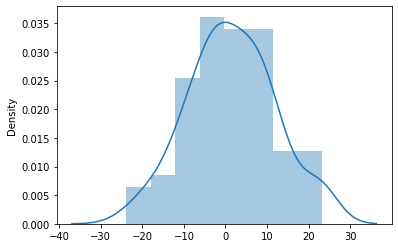

In [ ]:
#normal linear regression plot
import seaborn as sns
resid=np.array(y_test)-np.array(p)
sns.distplot(resid)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


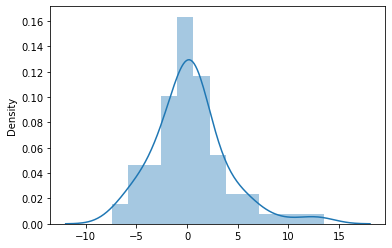

In [ ]:
#After PCA
resid=np.array(y_test)-np.array(p1)
sns.distplot(resid)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


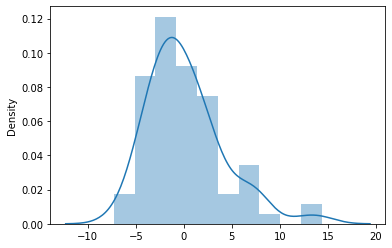

In [ ]:
#After lasso model
resid=np.array(y_test)-np.array(pred)
sns.distplot(resid)